# Compte-rendu Régression Linéaire ZRIBI KEBAILI JABER

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate

Question 1.

In [9]:
dataOrig=pd.read_csv('GSE17924_series_matrix.txt', sep='\t',skiprows=21, index_col=0)
phenotype=pd.read_csv('GSE17924_series_matrix.txt', sep='\t', index_col=0)
print(dataOrig)
phenotype=phenotype.iloc[2].to_frame()
#print(phenotype)
phenotype=phenotype.replace('severity: DF',0)
phenotype=phenotype.replace('severity: DHF',1)
phenotype=phenotype.replace('severity: DSS',2)

       GSM447781  GSM447782  GSM447783  GSM447784  GSM447785  GSM447786  \
12     11.519934  10.266369  11.517425  11.963806  11.982629  12.407864   
13      6.915259   6.584705   6.336898   5.881100   5.990039   7.346544   
14      9.818105  10.149880   9.712470   9.836638   9.955628  10.485600   
15      5.371255   5.462203   5.873331   4.544681   5.387667   6.158914   
16     11.843452  11.636645  11.452921  12.135660  12.134418  12.140635   
17      4.810572   4.863805   3.893979   5.605158   3.444473   4.729529   
18      7.450713   7.495921   7.288172   7.279210   7.434909   6.950945   
19     14.397061  14.840463  14.405493  15.060383  14.590845  14.660080   
20      5.763549   5.832707   6.228280   5.757566   5.887564   5.301891   
21      4.984783   5.497416   4.320078   4.385994   3.263066   4.351304   
22     14.836235  14.968295  15.192028  15.010664  14.732954  15.506819   
23      5.393241   5.751724   5.655986   5.398798   5.330872   4.952127   
24     10.425385  10.6386

In [10]:
data_transp=dataOrig.transpose()
#print(data_transp)

Question 2.a.

In [11]:
mean=data_transp.mean()

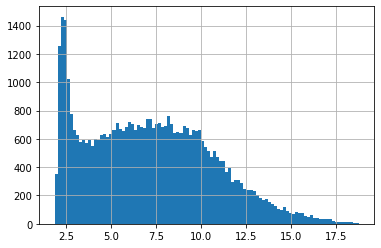

In [12]:
mean.hist(bins=100)

In [13]:
var=data_transp.var()

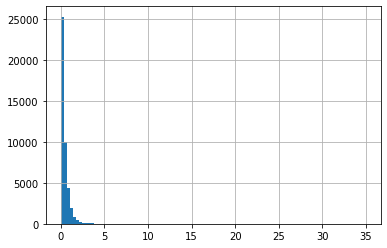

In [14]:
var.hist(bins=100)

In [15]:
Orig=dataOrig.copy()

In [16]:
Orig['Mean']=mean

In [17]:
Orig['Variance']=var

In [18]:
data2=Orig[Orig["Mean"]>3]
data3=data2[data2["Variance"]>2]
#print(data3)
data3 = data3.drop(columns = ['Mean', 'Variance'])
#print(data3)

Question 2.b.

(48, 618)


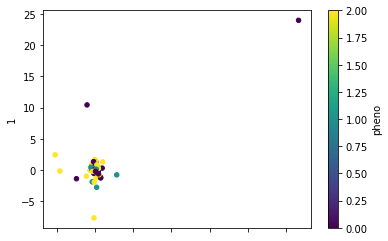

In [19]:
pca=PCA()
X=data3.values
data4=pca.fit_transform(X)
data_transform=data4.transpose()
df=pd.DataFrame(data_transform)
#print(df)
print(df.shape)
df['pheno']=phenotype.values
df.plot.scatter(x=0,y=1,c='pheno',colormap='viridis')

L'ACP ne permet pas, dans notre cas, de bien distinguer la répartition des ensembles de données des différentes classes, les données sont concentrées en un point à part quelques outliers et on ne peut en tirer aucune information utile.

Question 3.a.

In [20]:
import sklearn.linear_model as lm

In [21]:
X=data3.transpose().values
#print(X)
Y=phenotype.values
#print(Y)
reg=lm.LinearRegression().fit(X, Y)

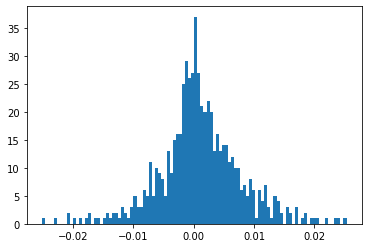

In [22]:
#print(reg.coef_)
coef=reg.coef_[0]
histo=plt.hist(coef, bins=100)

In [23]:
data3['coef']=(coef==0)
#print(data3)
print('Proportion de coefficient nuls : '+str(data3.coef.sum()/data3.shape[0]))
print('Plus gros coefficient : '+str(coef.max()))
print('Plus petit coefficient : '+str(coef.min()) )

Proportion de coefficient nuls : 0.0
Plus gros coefficient : 0.025300036075065778
Plus petit coefficient : -0.02505130702538279


Question 3.b.

L'estimation des coefficients dans une régression linéaire se fait par la minimisation du critère des moindres carrés entre une fonction affine recherchée et l'ensemble des données à notre disposition.

Question 4.a.

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


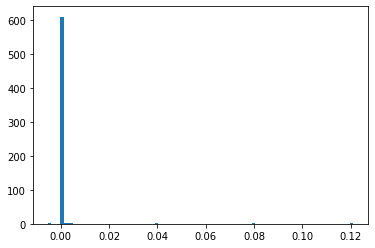

In [32]:
lasso=lm.LassoCV().fit(X, Y)
coef=lasso.coef_
histo=plt.hist(coef, bins=100)

In [33]:
data3['coef']=(coef==0)
#print(data3)
print('Proportion de coefficient nuls : '+str(data3.coef.sum()/data3.shape[0]))
print('Plus gros coefficient : '+str(coef.max()))
print('Plus petit coefficient : '+str(coef.min()) )

Proportion de coefficient nuls : 0.988673139158576
Plus gros coefficient : 0.12077112247592088
Plus petit coefficient : -0.005129897384960919


Question 4.b.

C’est une démarche itérative où l’on commence avec tous les coefficients égaux à 0. On fait évoluer les coefficients sélectivement.  On a ainsi des scénarios de solutions à mesure que le module des coefficients augmente. Et ce de façon à minimiser la valeur absolue de la différence entre les points du jeu de données et la droite constituée par ces coefficients.

Question 5

In [34]:
genes=pd.read_csv('ANNOTATIONS.txt', sep='\t', index_col = 'ID')

In [35]:
data5=data3[data3.coef==False]
data6=data5.index
data7=genes.loc[data6]
genes_l=data7.dropna()
print(genes_l)
genes_l.columns=['genes']
genes_l=genes_l.groupby(['genes'])
genes_l=genes_l.apply(lambda x: x.count())
#genes_l=genes_l.groupby(['genes']).apply(lambda x: x.count())
genes_l.columns=['occurence']
genes_l

      GENE_SYMBOL
9308        VSIG4
11010      RPS4Y2
20713       OLFM4
21103        SPP1
29664      COL1A2
33963    C1orf173


,occurence
genes,
C1orf173,1
COL1A2,1
OLFM4,1
RPS4Y2,1
SPP1,1
VSIG4,1


Question 6.

In [36]:
reg=lm.LinearRegression()
c_reg=cross_validate(reg, X, Y, cv=5)
c_reg

{'fit_time': array([0.00199723, 0.00199199, 0.0019877 , 0.00099421, 0.00196624]),
 'score_time': array([0.00099802, 0.00102949, 0.00100732, 0.00099397, 0.        ]),
 'test_score': array([ 0.57204784,  0.69771337,  0.67401539, -0.54196705,  0.51236105])}

In [31]:
lasso=lm.LassoCV()
cv_lasso=cross_validate(lasso, X, Y, cv=5);
cv_lasso

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to s

{'fit_time': array([0.49764347, 0.52360201, 0.67718768, 0.50864005, 0.54653883]),
 'score_time': array([0.00099683, 0.00099707, 0.        , 0.        , 0.00099707]),
 'test_score': array([ 0.56394624,  0.60504019,  0.72443247, -0.62670578,  0.49199137])}

Pour la régression linéaire, le nombre d'individu est très faible devant le nombre de features étant donné que les coefficients sont non nuls même s'ils sont proches de 0. Par conséquent, on observe un sur-apprentissage important dû au fait qu'il n'y a pas assez de données différentes pour approcher au mieux les points disponibles tout en obtenant une tendance générale que nous recherchons pour mieux généraliser dans de nouveaux cas.

Pour la régression Lasso, plus de 98.8% des coefficients sont mis à zéro. On se retrouve alors avec un nombre d'individu supérieur au nombre de features. Il y a alors un risque plus faible de sur-apprentissage lors de l'entrainement et un apprentissage que l'on peut considérer a priori comme de meilleure qualité. Cependant, lors des phases de tests, les performances de la régression lasso sont moins bonnes que dans le cas de la régression linéaire. Ceci peut-être dû aux faits que ces deux approches sont trop extrêmes et qu'il fallait mieux utiliser un juste milieu telle que la régression Elastic-net pour obtenir de meilleurs résultats.

Question 7

Lors de la validation croisée, nous sommes dans l'obligation de garder une partie de notre ensemble de données pour tester notre apprentissage sur des données. Ceci est embêtant car cela nous empêche d'utiliser l'ensemble des informations à notre disposition pour optimiser nos performances. Cela influe sur la qualité de l'estimation du résultat final, qui est fonction de la taille du dataset à notre disposition. Nous n'avons donc qu'une approximation plus ou moins précise du résultat réel de l'apprentissage sur notre dataset avec la validation croisée, ce n'est pas une estimation parfaite de la performance. 